In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class LogisticRegression:
    def __init__(self, lr=0.01, num_iter=1000, fit_intercept=True):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.lossHistory = []

    def add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)

    def softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def cross_entropy_loss(self, y_true, y_pred):
        return -np.mean(np.sum(y_true * np.log(y_pred), axis=1))

    def fit(self, X, y):
        if self.fit_intercept:
            X = self.add_intercept(X)

        num_classes = y.shape[1]
        self.theta = np.zeros((X.shape[1], num_classes))

        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            y_pred = self.softmax(z)
            self.lossHistory.append(self.cross_entropy_loss(y, y_pred))
            gradient = np.dot(X.T, y_pred - y) / y.shape[0]
            self.theta -= self.lr * gradient

    def predict(self, X):
        if self.fit_intercept:
            X = self.add_intercept(X)

        return np.argmax(self.softmax(np.dot(X, self.theta)), axis=1)
    
    def accuracy(self, y_true, y_pred):
        return np.mean(y_true == y_pred)
    
    def confusion_matrix(self, y_true, y_pred):
        num_classes = y_true.shape[1]
        confusion_mat = np.zeros((num_classes, num_classes))
        
        for i in range(num_classes):
            for j in range(num_classes):
                confusion_mat[i][j] = np.sum((y_true[:,i]==1) & (y_pred[:,j]==1))
        
        return confusion_mat
    
    def plot_confusion_matrix(self, y_true, y_pred, classes):
        confusion_mat = self.confusion_matrix(y_true, y_pred)
        num_classes = len(classes)
        fig, ax = plt.subplots()
        im = ax.imshow(confusion_mat, cmap='Blues')

        # We want to show all ticks...
        ax.set_xticks(np.arange(num_classes))
        ax.set_yticks(np.arange(num_classes))
        # ... and label them with the respective list entries
        ax.set_xticklabels(classes)
        ax.set_yticklabels(classes)

        # Rotate the tick labels and set their alignment.
        plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
                 rotation_mode="anchor")

        # Loop over data dimensions and create text annotations.
        for i in range(num_classes):
            for j in range(num_classes):
                text = ax.text(j, i, int(confusion_mat[i, j]),
                               ha="center", va="center", color="w")

        ax.set_title("Confusion matrix")
        fig.tight_layout()
        plt.show()


+ load data

In [2]:
df_train = pd.DataFrame(pd.read_csv("./PR_HW2_blob_train.csv"))
df_test  = pd.DataFrame(pd.read_csv("./PR_HW2_blob_test.csv"))

X_train = df_train[['Feature1', 'Feature2']].to_numpy()
y_train = df_train[['Target']].to_numpy().ravel()

X_test = df_test[['Feature1', 'Feature2']].to_numpy()
y_test = df_test[['Target']].to_numpy().ravel()

y_train_onehot = np.eye(3)[y_train]
y_test_onehot = np.eye(3)[y_test]

Train Accuracy: 0.893
Train Confusion matrix:
[[276.   0.  51.]
 [  0. 334.   0.]
 [ 56.   0. 283.]]


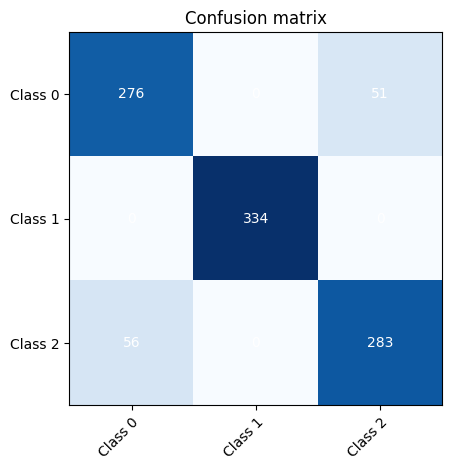

In [3]:
lr = LogisticRegression(lr=0.1, num_iter=1000, fit_intercept=True)
lr.fit(X_train, y_train_onehot)
y_pred = lr.predict(X_train)
y_pred_onehot = np.eye(3)[y_pred]
accuracy = lr.accuracy(y_train, y_pred)
confusion_mat = lr.confusion_matrix(y_train_onehot, y_pred_onehot)
print(f"Train Accuracy: {accuracy}")
print(f"Train Confusion matrix:\n{confusion_mat}")
classes = ["Class 0", "Class 1", "Class 2"]
lr.plot_confusion_matrix(y_train_onehot, y_pred_onehot, classes)

Test Accuracy: 0.882
Test Confusion matrix:
[[284.   0.  56.]
 [  0. 333.   0.]
 [ 62.   0. 265.]]


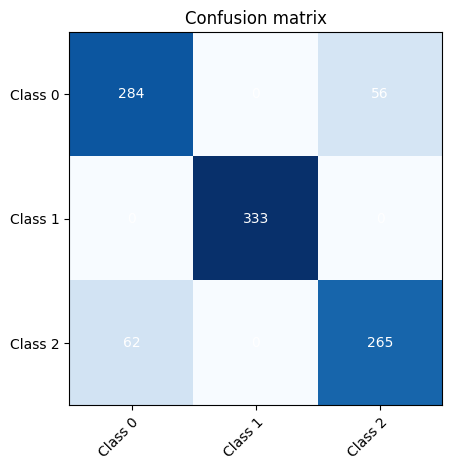

In [4]:
y_pred = lr.predict(X_test)
y_pred_onehot = np.eye(3)[y_pred]
accuracy = lr.accuracy(y_test, y_pred)
confusion_mat = lr.confusion_matrix(y_test_onehot, y_pred_onehot)
print(f"Test Accuracy: {accuracy}")
print(f"Test Confusion matrix:\n{confusion_mat}")
classes = ["Class 0", "Class 1", "Class 2"]
lr.plot_confusion_matrix(y_test_onehot, y_pred_onehot, classes)

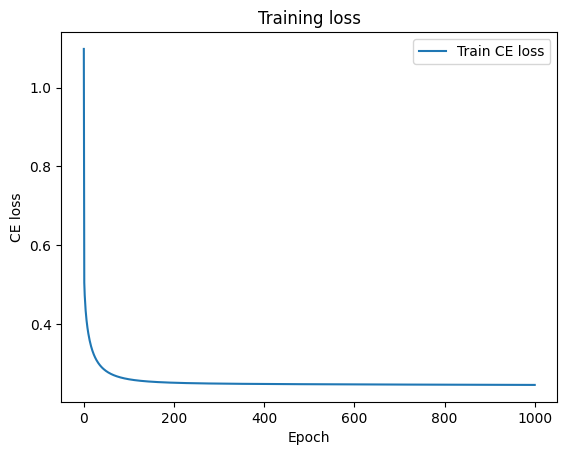

In [5]:
plt.plot(np.linspace(0, 1000, 1000), lr.lossHistory, label='Train CE loss')
plt.title("Training loss")
plt.ylabel("CE loss")
plt.xlabel("Epoch")
plt.legend()